In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import numpy as np

In [2]:
df1_tweets = pd.read_csv('train_tweets.csv')
df2_tweets = pd.read_csv('test_tweets.csv')

In [3]:
df1_tweets

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,C,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,C,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,A,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,A,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,A,0,"['79', '80', '98', '99', '43', '89']",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29620,24846,4,2019,8,30,17,0.0,1.0,0.0,True,A,0,"['78', '79', '80', '98', '99', '100', '78', '7...",3
29621,7320,21,2018,12,21,13,2.0,1.0,0.0,True,A,0,"['98', '99', '100']",2
29622,7447,21,2018,9,29,18,0.0,1.0,0.0,True,A,0,"['98', '99', '100']",2
29623,26737,41,2017,2,5,16,0.0,2.0,0.0,True,A,0,NaN,2


In [4]:
df1_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29625 entries, 0 to 29624
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                29625 non-null  int64  
 1   tweet_user_id           29625 non-null  int64  
 2   tweet_created_at_year   29625 non-null  int64  
 3   tweet_created_at_month  29625 non-null  int64  
 4   tweet_created_at_day    29625 non-null  int64  
 5   tweet_created_at_hour   29625 non-null  int64  
 6   tweet_hashtag_count     29625 non-null  float64
 7   tweet_url_count         29625 non-null  float64
 8   tweet_mention_count     29625 non-null  float64
 9   tweet_has_attachment    29625 non-null  bool   
 10  tweet_attachment_class  29625 non-null  object 
 11  tweet_language_id       29625 non-null  int64  
 12  tweet_topic_ids         25340 non-null  object 
 13  virality                29625 non-null  int64  
dtypes: bool(1), float64(3), int64(8), obje

In [5]:
for col in df1_tweets.columns:
    print('Column: {0}. Unique Count: {1}'.format(col, df1_tweets[col].unique()))

Column: tweet_id. Unique Count: [34698 24644 36321 ...  7447 26737  5151]
Column: tweet_user_id. Unique Count: [10  4 54 42 32 34 43 16 37  6 39  3 22 11 45 31 23  0  1 49 33 28 19 48
 27  5 47 38 46 18 17 26 40 50 52 15  2 12  8 30 53 14 35 41 44 20 24 13
 21 55  7 25]
Column: tweet_created_at_year. Unique Count: [2015 2020 2019 2016 2021 2018 2017 2013 2014]
Column: tweet_created_at_month. Unique Count: [12  6  9 11  8  7  3  1  2 10  5  4]
Column: tweet_created_at_day. Unique Count: [ 5 19  2  6  4 22 11 10 30 15 17 24 21 12 16 23 27  8 25 18 14 26  7 13
  1 28  9 20 31  3 29]
Column: tweet_created_at_hour. Unique Count: [ 3  0 15 17 20 13 18  8 11 14 21  1 12 19 23 16 10  5  4 22  9  7  2  6]
Column: tweet_hashtag_count. Unique Count: [ 2.  0.  3.  5.  1.  4.  6.  7.  8. 11. 10. 14.  9.]
Column: tweet_url_count. Unique Count: [1. 3. 2. 5. 4. 0. 6. 8.]
Column: tweet_mention_count. Unique Count: [ 0.  1.  2.  6.  3.  4.  5.  8.  7. 10.  9. 13. 16. 11. 15. 14.]
Column: tweet_has_attac

In [6]:
categorical_val = []
continous_val = []
for column in df1_tweets.columns:
    print('==================================================================')
    print(f"{column} : {df1_tweets[column].unique()}")
    if len(df1_tweets[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

tweet_id : [34698 24644 36321 ...  7447 26737  5151]
tweet_user_id : [10  4 54 42 32 34 43 16 37  6 39  3 22 11 45 31 23  0  1 49 33 28 19 48
 27  5 47 38 46 18 17 26 40 50 52 15  2 12  8 30 53 14 35 41 44 20 24 13
 21 55  7 25]
tweet_created_at_year : [2015 2020 2019 2016 2021 2018 2017 2013 2014]
tweet_created_at_month : [12  6  9 11  8  7  3  1  2 10  5  4]
tweet_created_at_day : [ 5 19  2  6  4 22 11 10 30 15 17 24 21 12 16 23 27  8 25 18 14 26  7 13
  1 28  9 20 31  3 29]
tweet_created_at_hour : [ 3  0 15 17 20 13 18  8 11 14 21  1 12 19 23 16 10  5  4 22  9  7  2  6]
tweet_hashtag_count : [ 2.  0.  3.  5.  1.  4.  6.  7.  8. 11. 10. 14.  9.]
tweet_url_count : [1. 3. 2. 5. 4. 0. 6. 8.]
tweet_mention_count : [ 0.  1.  2.  6.  3.  4.  5.  8.  7. 10.  9. 13. 16. 11. 15. 14.]
tweet_has_attachment : [False  True]
tweet_attachment_class : ['C' 'A' 'B']
tweet_language_id : [ 0  3  6  4  9  1 15 23  5 18 19  8 12 20  7 10  2 28 11 21 22 27 13 14
 30 29 24 16 25 17]
tweet_topic_ids : ["['3

<AxesSubplot:>

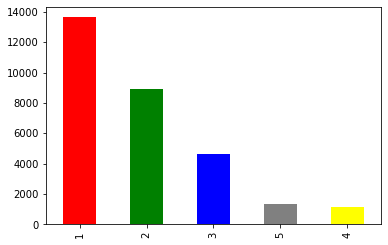

In [7]:
df1_tweets.virality.value_counts().plot(kind="bar", color=["red", "green","blue","grey","yellow"])

In [8]:
df1_tweets.isna().sum()

tweet_id                     0
tweet_user_id                0
tweet_created_at_year        0
tweet_created_at_month       0
tweet_created_at_day         0
tweet_created_at_hour        0
tweet_hashtag_count          0
tweet_url_count              0
tweet_mention_count          0
tweet_has_attachment         0
tweet_attachment_class       0
tweet_language_id            0
tweet_topic_ids           4285
virality                     0
dtype: int64

In [9]:
missing_values_count = df1_tweets.isnull().sum()

total_cells = np.product(df1_tweets.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

1.0331525015069318


In [10]:
NAN = [(c, df1_tweets[c].isnull().mean()*100) for c in df1_tweets]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,tweet_id,0.000000
1,tweet_user_id,0.000000
2,tweet_created_at_year,0.000000
3,tweet_created_at_month,0.000000
4,tweet_created_at_day,0.000000
5,tweet_created_at_hour,0.000000
6,tweet_hashtag_count,0.000000
7,tweet_url_count,0.000000
8,tweet_mention_count,0.000000
9,tweet_has_attachment,0.000000


In [11]:
df1_tweets.ffill(inplace=True)

In [12]:
df1_tweets.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,C,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,C,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,A,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,A,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,A,0,"['79', '80', '98', '99', '43', '89']",2


In [13]:
df1_tweets.isna().sum()

tweet_id                  0
tweet_user_id             0
tweet_created_at_year     0
tweet_created_at_month    0
tweet_created_at_day      0
tweet_created_at_hour     0
tweet_hashtag_count       0
tweet_url_count           0
tweet_mention_count       0
tweet_has_attachment      0
tweet_attachment_class    0
tweet_language_id         0
tweet_topic_ids           0
virality                  0
dtype: int64

A    17511
C    11825
B      289
Name: tweet_attachment_class, dtype: int64

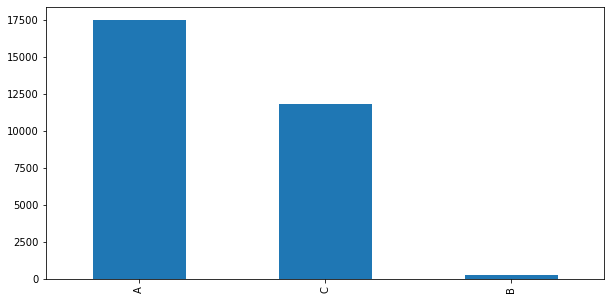

In [14]:
df1_tweets['tweet_attachment_class'].value_counts().plot(kind ='bar',figsize=[10,5])
df1_tweets['tweet_attachment_class'].value_counts()

In [15]:
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()
le.fit(df1_tweets['tweet_has_attachment'])
list(le.classes_)
df1_tweets['tweet_has_attachment'] = le.transform(df1_tweets['tweet_has_attachment']) 

In [17]:
le1 = preprocessing.LabelEncoder()
le.fit(df1_tweets['tweet_attachment_class'])
list(le.classes_)
df1_tweets['tweet_attachment_class'] = le.transform(df1_tweets['tweet_attachment_class'])

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
x = df1_tweets.copy()
y = x.pop('virality')

In [20]:
for colname in x.select_dtypes('object'):
    x[colname],_ = x[colname].factorize()
    
discrete_features = x.dtypes ==int

In [21]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(x, y, discrete_features):
    mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores[::1]

tweet_id                  0.483595
tweet_user_id             0.372126
tweet_topic_ids           0.124294
tweet_url_count           0.019552
tweet_created_at_year     0.018420
tweet_has_attachment      0.014654
tweet_created_at_hour     0.011464
tweet_hashtag_count       0.009618
tweet_created_at_month    0.008386
tweet_mention_count       0.005680
tweet_created_at_day      0.004760
tweet_attachment_class    0.004688
tweet_language_id         0.000849
Name: MI Scores, dtype: float64

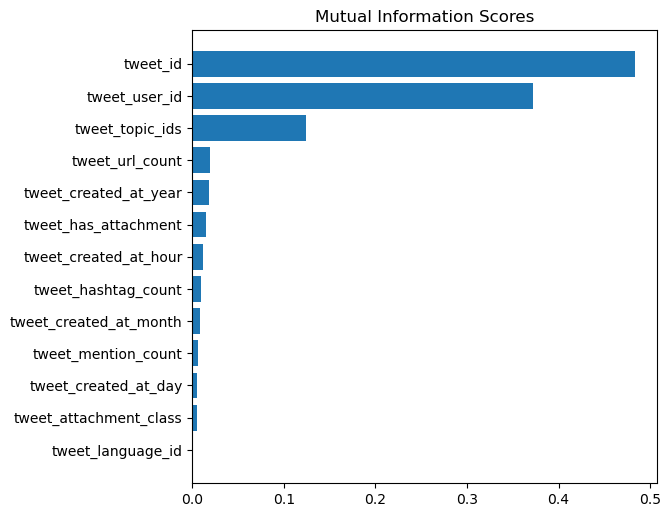

In [22]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(6,6))
plot_mi_scores(mi_scores)

C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    13632
2     8889
3     4646
5     1323
4     1135
Name: virality, dtype: int64


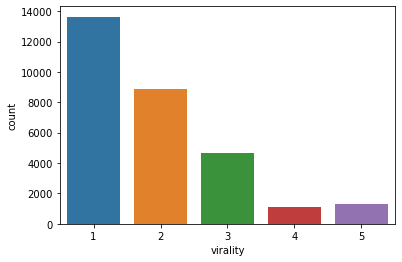

In [23]:
z = df1_tweets["virality"]

sns.countplot(z)


target_temp = df1_tweets.virality .value_counts()

print(target_temp)

In [24]:
print("Percentage of tweets rated 5: "+str(y.where(y==5).count()*100/29625))
print("Percentage of tweets rated 4: "+str(y.where(y==4).count()*100/29625))
print("Percentage of tweets rated 3: " +str(y.where(y==3).count()*100/29625))
print("Percentage of tweets rated 2: "+str(y.where(y==2).count()*100/29625))
print("Percentage of tweets rated 1: "+str(y.where(y==1).count()*100/29625))

Percentage of tweets rated 5: 4.465822784810126
Percentage of tweets rated 4: 3.831223628691983
Percentage of tweets rated 3: 15.682700421940929
Percentage of tweets rated 2: 30.00506329113924
Percentage of tweets rated 1: 46.01518987341772


[10  4 54 42 32 34 43 16 37  6 39  3 22 11 45 31 23  0  1 49 33 28 19 48
 27  5 47 38 46 18 17 26 40 50 52 15  2 12  8 30 53 14 35 41 44 20 24 13
 21 55  7 25]


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tweet_user_id', ylabel='virality'>

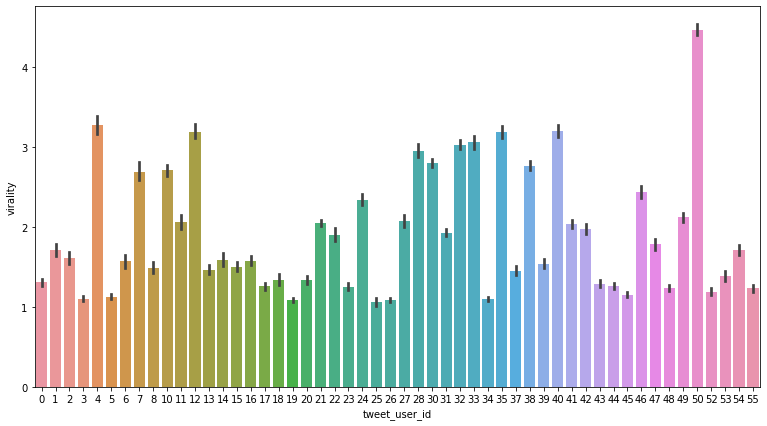

In [25]:
print(df1_tweets["tweet_user_id"].unique())
plt.figure(figsize=(13,7))
sns.barplot(df1_tweets["tweet_user_id"],y)

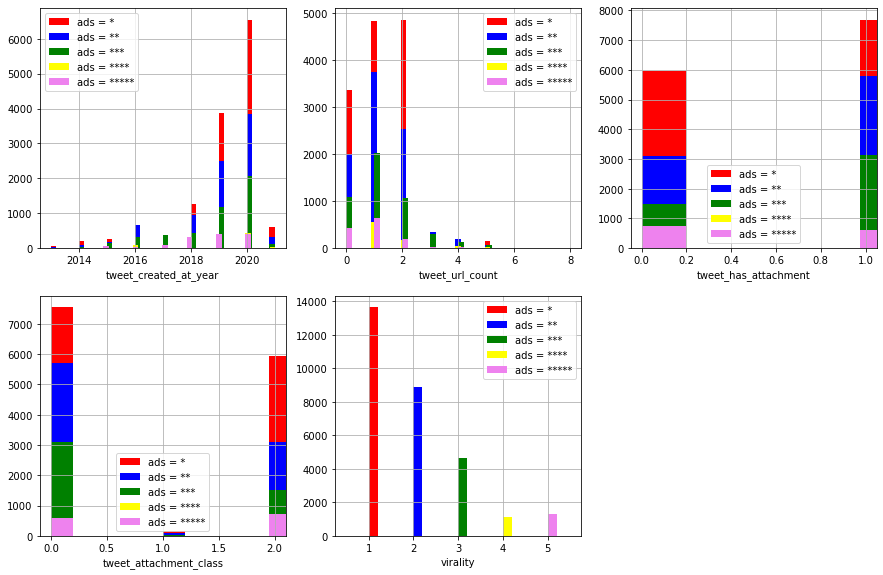

In [26]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df1_tweets[df1_tweets["virality"] == 1][column].hist(bins=40, color='red', label='ads = *', alpha=1,width=0.2)
    df1_tweets[df1_tweets["virality"] == 2][column].hist(bins=40, color='blue', label='ads = **', alpha=1,width=0.2)
    df1_tweets[df1_tweets["virality"] == 3][column].hist(bins=40, color='green', label='ads = ***', alpha=1,width=0.2)
    df1_tweets[df1_tweets["virality"] == 4][column].hist(bins=40, color='yellow', label='ads = ****', alpha=1,width=0.2)
    df1_tweets[df1_tweets["virality"] == 5][column].hist(bins=40, color='violet', label='ads = *****', alpha=1,width=0.2)
    plt.legend()
    plt.xlabel(column)

["['36', '36', '36', '36', '36', '36', '37', '37', '37', '37', '37', '37']"
 "['43', '78', '79', '80', '80', '89', '98', '99', '100']"
 "['79', '80', '98', '98', '98', '99', '99', '100', '100', '79', '80']"
 ... "['45', '45', '78', '79', '79', '80']"
 "['80', '98', '99', '99', '80']"
 "['156', '79', '80', '80', '81', '81', '98', '99']"]


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tweet_topic_ids', ylabel='virality'>

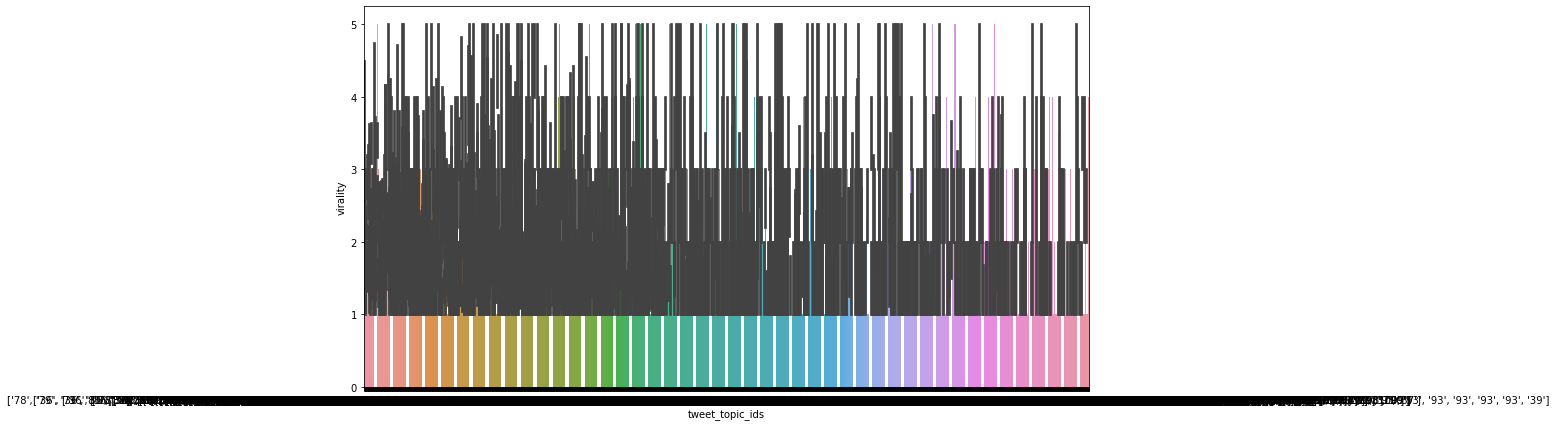

In [27]:
print(df1_tweets["tweet_topic_ids"].unique())
plt.figure(figsize=(13,7))
sns.barplot(df1_tweets["tweet_topic_ids"],y)

C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tweet_hashtag_count', ylabel='Density'>

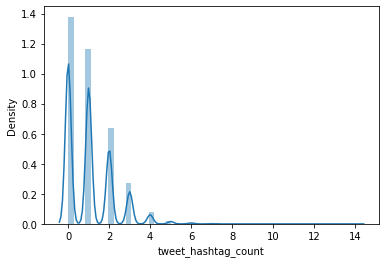

In [28]:
sns.distplot(df1_tweets["tweet_hashtag_count"])

<AxesSubplot:xlabel='tweet_created_at_year', ylabel='Count'>

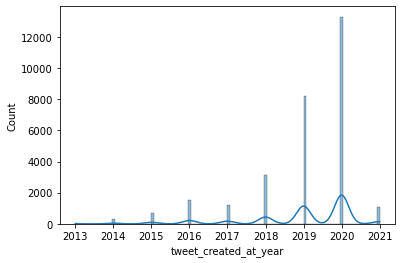

In [29]:
sns.histplot(data=df1_tweets, x="tweet_created_at_year", kde = True)

<AxesSubplot:xlabel='tweet_user_id', ylabel='Count'>

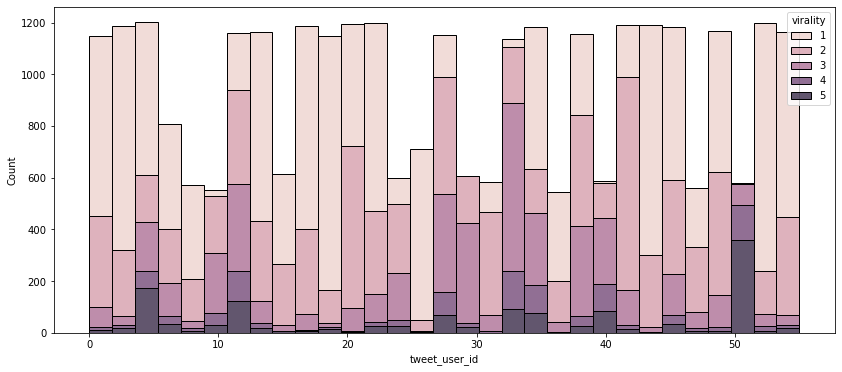

In [30]:
plt.figure(figsize=(14,6))
sns.histplot(data=df1_tweets, x="tweet_user_id", hue="virality",multiple="stack")

In [31]:
df1_tweets

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
0,34698,10,2015,12,5,3,2.0,1.0,0.0,0,2,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3
1,24644,4,2020,6,19,0,0.0,1.0,0.0,0,2,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3
2,36321,54,2019,6,2,15,2.0,3.0,0.0,1,0,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1
3,2629,42,2020,9,6,17,0.0,1.0,1.0,1,0,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2
4,28169,32,2020,11,4,17,2.0,1.0,0.0,1,0,0,"['79', '80', '98', '99', '43', '89']",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29620,24846,4,2019,8,30,17,0.0,1.0,0.0,1,0,0,"['78', '79', '80', '98', '99', '100', '78', '7...",3
29621,7320,21,2018,12,21,13,2.0,1.0,0.0,1,0,0,"['98', '99', '100']",2
29622,7447,21,2018,9,29,18,0.0,1.0,0.0,1,0,0,"['98', '99', '100']",2
29623,26737,41,2017,2,5,16,0.0,2.0,0.0,1,0,0,"['98', '99', '100']",2


<AxesSubplot:xlabel='tweet_created_at_day', ylabel='Count'>

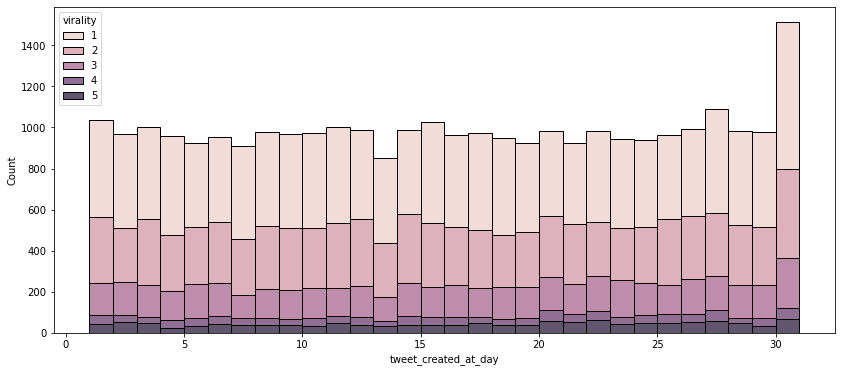

In [32]:
plt.figure(figsize=(14,6))
sns.histplot(data=df1_tweets, x="tweet_created_at_day", hue="virality",multiple="stack")

### Rating 1 tweets ar made at daily basis but virality is not so much but 5 star are less nut go much viral

<AxesSubplot:xlabel='tweet_created_at_hour', ylabel='Count'>

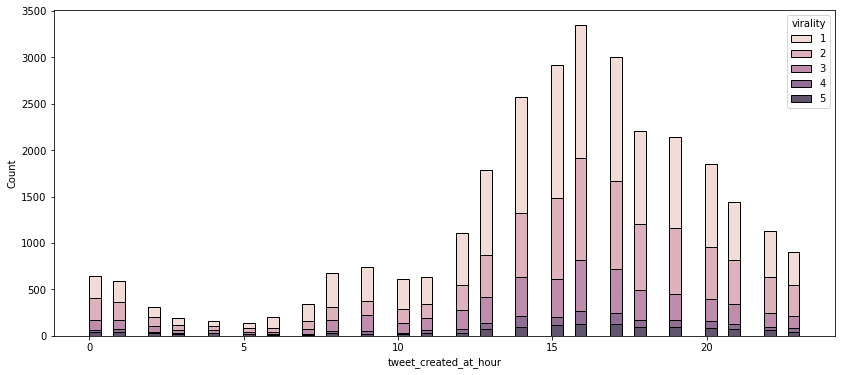

In [33]:
plt.figure(figsize=(14,6))
sns.histplot(data=df1_tweets, x="tweet_created_at_hour", hue="virality",multiple="stack")

#### At evening time tweets go viral due to most of the person goes free at evening time.

<AxesSubplot:xlabel='tweet_created_at_month', ylabel='Count'>

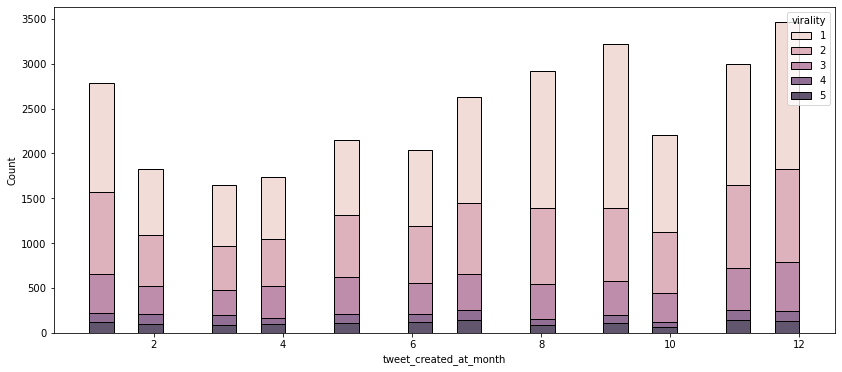

In [34]:
plt.figure(figsize=(14,6))
sns.histplot(data=df1_tweets, x="tweet_created_at_month", hue="virality",multiple="stack")

##### tweets are most viral in july , august, september but fall in october due to exam time & this shows virality main focused by students

<AxesSubplot:xlabel='tweet_created_at_hour', ylabel='virality'>

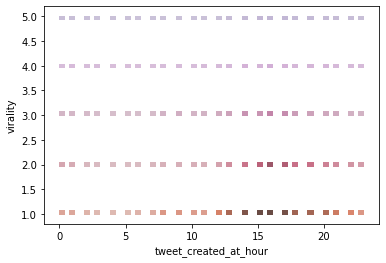

In [35]:
sns.histplot(
    df1_tweets, x="tweet_created_at_hour", y="virality", hue="virality", legend=False
)

## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [37]:
X_train.shape

(20737, 13)

In [38]:
X_test.shape

(8888, 13)

## Model Fitting

In [39]:
from sklearn.metrics import accuracy_score

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
Y_pred_lr.shape

(8888,)

In [42]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 45.44 %


## Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [44]:
Y_pred_nb.shape

(8888,)

In [45]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 46.28 %


In [46]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[20:22:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [47]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 66.93 %


## K Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [49]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 62.62 %


## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [51]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 58.61 %


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

In [53]:
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [54]:
y_pred = classifier.predict(X_test)

print("Classification Report:",)
print (classification_report(Y_test, y_pred))
print("Accuracy:", accuracy_score(Y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.86      0.81      4039
           2       0.57      0.55      0.56      2674
           3       0.59      0.53      0.56      1452
           4       0.24      0.08      0.12       363
           5       0.54      0.43      0.48       360

    accuracy                           0.66      8888
   macro avg       0.54      0.49      0.50      8888
weighted avg       0.64      0.66      0.65      8888

Accuracy: 0.6637038703870387
Confusion Matrix:
[[3492  514   27    3    3]
 [ 920 1458  280    8    8]
 [ 142  435  764   58   53]
 [  42   78  143   30   70]
 [  29   61   87   28  155]]


In [55]:
score_rdc = round(accuracy_score(y_pred,Y_test)*100,2)

print("The accuracy score achieved using random forest is: "+str(score_rdc)+" %")

The accuracy score achieved using random forest is: 66.37 %


## Final Accuracy of all Models that which Model is best fitted

In [56]:
scores = [score_lr,score_nb,score_knn,score_dt,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 45.44 %
The accuracy score achieved using Naive Bayes is: 46.28 %
The accuracy score achieved using K-Nearest Neighbors is: 62.62 %
The accuracy score achieved using Decision Tree is: 58.61 %
The accuracy score achieved using XGBoost is: 66.93 %


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

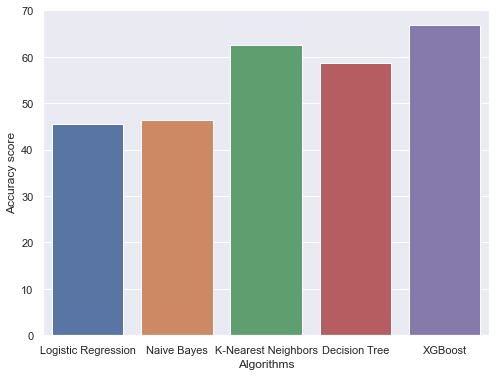

In [57]:
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [81]:
df2_tweets

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids
0,6238,13,2020,7,26,10,5.0,2.0,0.0,True,A,0,"['98', '99', '99', '99', '99', '78', '79', '80']"
1,37458,14,2018,1,15,18,0.0,0.0,1.0,False,C,0,"['78', '79', '80', '98']"
2,23968,50,2019,2,25,20,0.0,1.0,0.0,False,C,0,"['78', '79', '80']"
3,24137,50,2018,12,8,21,0.0,1.0,1.0,False,C,0,"['78', '79', '80']"
4,8064,30,2020,9,29,16,2.0,2.0,0.0,True,A,0,"['78', '79', '79', '80', '98', '99']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12692,2418,37,2016,3,21,18,1.0,0.0,1.0,False,C,0,NaN
12693,40872,12,2020,2,29,19,0.0,1.0,0.0,False,C,0,"['78', '79', '80']"
12694,29847,38,2020,12,2,21,4.0,1.0,0.0,False,C,0,"['79', '80', '98', '99']"
12695,2939,42,2019,8,24,16,3.0,1.0,3.0,True,A,0,"['80', '98', '99', '100', '43', '43', '79', '8..."


In [83]:
NAN = [(c, df2_tweets[c].isnull().mean()*100) for c in df2_tweets]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,tweet_id,0.000000
1,tweet_user_id,0.000000
2,tweet_created_at_year,0.000000
3,tweet_created_at_month,0.000000
4,tweet_created_at_day,0.000000
5,tweet_created_at_hour,0.000000
6,tweet_hashtag_count,0.000000
7,tweet_url_count,0.000000
8,tweet_mention_count,0.000000
9,tweet_has_attachment,0.000000


In [84]:
columns_None = ['tweet_topic_ids']
df2_tweets[columns_None] = df2_tweets[columns_None].fillna(df2_tweets.mode().iloc[0])

In [86]:
le2 = preprocessing.LabelEncoder()
le2.fit(df2_tweets['tweet_has_attachment'])
list(le2.classes_)
df2_tweets['tweet_has_attachment'] = le2.transform(df2_tweets['tweet_has_attachment'])

In [87]:
le3 = preprocessing.LabelEncoder()
le3.fit(df2_tweets['tweet_attachment_class'])
list(le3.classes_)
df2_tweets['tweet_attachment_class'] = le3.transform(df2_tweets['tweet_attachment_class'])

In [88]:
df2_tweets. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12697 entries, 0 to 12696
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                12697 non-null  int64  
 1   tweet_user_id           12697 non-null  int64  
 2   tweet_created_at_year   12697 non-null  int64  
 3   tweet_created_at_month  12697 non-null  int64  
 4   tweet_created_at_day    12697 non-null  int64  
 5   tweet_created_at_hour   12697 non-null  int64  
 6   tweet_hashtag_count     12697 non-null  float64
 7   tweet_url_count         12697 non-null  float64
 8   tweet_mention_count     12697 non-null  float64
 9   tweet_has_attachment    12697 non-null  int64  
 10  tweet_attachment_class  12697 non-null  int32  
 11  tweet_language_id       12697 non-null  int64  
 12  tweet_topic_ids         12697 non-null  object 
dtypes: float64(3), int32(1), int64(8), object(1)
memory usage: 1.2+ MB


In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
for colname in df2_tweets.select_dtypes('object'):
    df2_tweets[colname],_ = df2_tweets[colname].factorize()
    
discrete_features = df2_tweets.dtypes ==int

In [93]:
df2_tweets

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids
0,6238,13,2020,7,26,10,5.0,2.0,0.0,1,0,0,0
1,37458,14,2018,1,15,18,0.0,0.0,1.0,0,2,0,1
2,23968,50,2019,2,25,20,0.0,1.0,0.0,0,2,0,2
3,24137,50,2018,12,8,21,0.0,1.0,1.0,0,2,0,2
4,8064,30,2020,9,29,16,2.0,2.0,0.0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12692,2418,37,2016,3,21,18,1.0,0.0,1.0,0,2,0,2
12693,40872,12,2020,2,29,19,0.0,1.0,0.0,0,2,0,2
12694,29847,38,2020,12,2,21,4.0,1.0,0.0,0,2,0,28
12695,2939,42,2019,8,24,16,3.0,1.0,3.0,1,0,0,2372


In [95]:
df2_tweets.shape

(12697, 13)

In [96]:
Y_pred_lr = lr.predict(df2_tweets)

In [97]:
Y_pred_xgb = xgb_model.predict(df2_tweets)

C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [98]:
Y_pred_dt = dt.predict(df2_tweets)

In [99]:
Y_pred_knn=knn.predict(df2_tweets)

In [106]:
submission1 = pd.DataFrame({
        "tweet_id": df2_tweets['tweet_id'],
        "Virality": Y_pred_xgb
    })

In [107]:
submission2 = pd.DataFrame({
        "tweet_id": df2_tweets['tweet_id'],
        "Virality": Y_pred_knn
    })

In [108]:
submission3 = pd.DataFrame({
        "tweet_id": df2_tweets['tweet_id'],
        "virality": Y_pred_dt
    })

In [109]:
submission4 = pd.DataFrame({
        "tweet_id": df2_tweets['tweet_id'],
        "Virality": Y_pred_lr
    })

In [110]:
submission1

,tweet_id,Virality
0,6238,1
1,37458,1
2,23968,5
3,24137,5
4,8064,2
...,...,...
12692,2418,2
12693,40872,3
12694,29847,3
12695,2939,2


In [111]:
submission2

,tweet_id,Virality
0,6238,1
1,37458,1
2,23968,5
3,24137,5
4,8064,2
...,...,...
12692,2418,1
12693,40872,3
12694,29847,3
12695,2939,2


In [112]:
submission3

,tweet_id,virality
0,6238,2
1,37458,1
2,23968,4
3,24137,5
4,8064,3
...,...,...
12692,2418,1
12693,40872,3
12694,29847,3
12695,2939,2


In [113]:
submission4

,tweet_id,Virality
0,6238,1
1,37458,1
2,23968,1
3,24137,1
4,8064,1
...,...,...
12692,2418,1
12693,40872,1
12694,29847,1
12695,2939,1


In [114]:
submission1.to_csv('ViralTweets1.csv', index=False)

In [115]:
submission2.to_csv('ViralTweets2.csv', index=False)

In [116]:
submission3.to_csv('ViralTweets3.csv', index=False)

In [117]:
submission4.to_csv('ViralTweets4.csv', index=False)